# Tutorial on mdPCA and maasMDS Visualization

In [1]:
import sys, os

dir = os.path.abspath('../')
if not dir in sys.path: sys.path.append(dir)

import logging
from snputils.snp.io.read.vcf import VCFReader
from snputils.ancestry.io.local.read import MSPReader
from snputils.processing.mdpca import mdPCA
from snputils.processing.maasmds import maasMDS
from snputils.processing._utils.gen_tools import logger_config
from snputils.visualization.scatter_plot import scatter

### 1. Load Input Data for mdPCA

Load data files required for running mdPCA, including SNP and LAI data, along with the labels file specifying ancestry labels.

In [2]:
# File paths for SNP data, LAI data, and sample labels
vcf_path = '../data/easComp_6_samples_chr1.vcf'
msp_path = '../data/easComp_6_samples_chr1.msp'
labels_file = '../data/easComp_6_samples_chr1_labels.tsv'

# Load SNP data from VCF file
snpobj = VCFReader(vcf_path).read(phased=True)

# Load LAI data from MSP file
laiobj = MSPReader(msp_path).read()

# Configure logging to display messages in the console
logging.config.dictConfig(logger_config(verbose=True))

### 2. Run mdPCA

Initialize and run the mdPCA analysis.

In [3]:
# Initialize the mdPCA object with SNP and LAI data, labels file, and selected ancestry
mdpca = mdPCA(
    snpobj=snpobj,         # SNP data object
    laiobj=laiobj,         # LAI data object
    labels_file=labels_file, # File containing sample labels
    ancestry="4"           # Ancestry component to analyze (e.g., '4' for East Asia)
)

[INFO] 2024-11-07 19:50:17: ------ Array 1 Processing: ------
[INFO] 2024-11-07 19:50:18: VCF Processing Time: --- 0.08600831031799316 seconds ---
[INFO] 2024-11-07 19:50:18: TSV Processing Time: --- 0.15805792808532715 seconds ---
[INFO] 2024-11-07 19:50:18: Masking for ancestry 0 --- 0.0008826255798339844 seconds ---
[INFO] 2024-11-07 19:50:18: Masking for ancestry 1 --- 0.0011031627655029297 seconds ---
[INFO] 2024-11-07 19:50:18: Masking for ancestry 2 --- 0.0011937618255615234 seconds ---
[INFO] 2024-11-07 19:50:18: Masking for ancestry 3 --- 0.002419710159301758 seconds ---
[INFO] 2024-11-07 19:50:18: Masking for ancestry 4 --- 0.0024635791778564453 seconds ---
[INFO] 2024-11-07 19:50:18: Covariance Matrix --- 0.12539339065551758 seconds ---
[INFO] 2024-11-07 19:50:18: Percent variance explained by the principal component 1: 40.669909765458044
[INFO] 2024-11-07 19:50:18: Percent variance explained by the principal component 2: 35.32331274768433


In [4]:
print("X_new", mdpca.X_new_)

X_new [[ 0.05753786 -0.07705574]
 [ 0.31123924  0.07635565]
 [-0.14243854 -0.03442202]
 [-0.07117519 -0.22365777]
 [-0.15516337  0.25877988]]


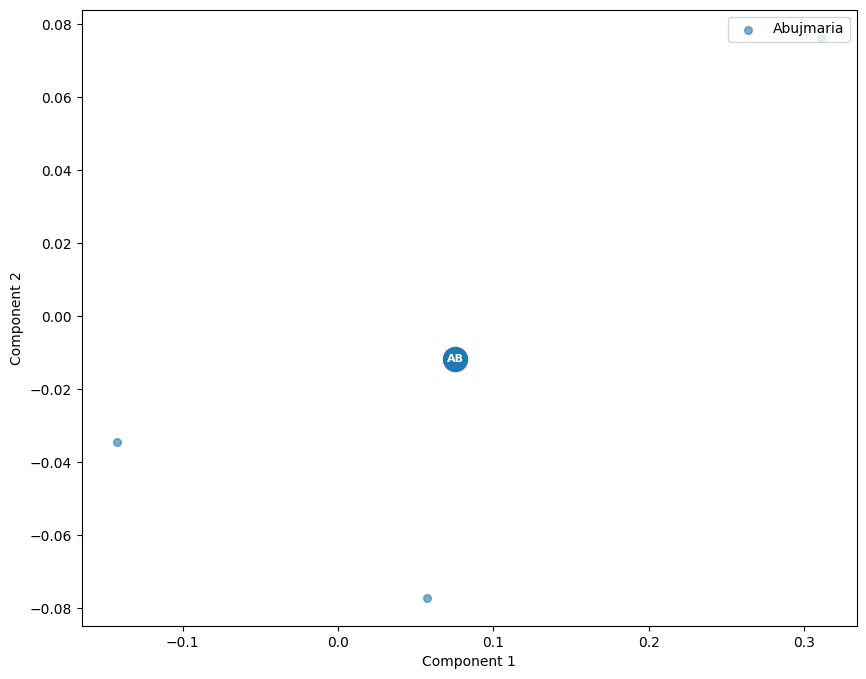

In [5]:
scatter(mdpca, labels_file)

### 3. Run maasMDS

Initialize and run the maasMDS analysis.

In [6]:
# Configure logging to display messages in the console
logging.config.dictConfig(logger_config(verbose=True))

# Initialize the maasMDS object with SNP and LAI data, labels file, and selected ancestry
mds = maasMDS(
    snpobj=snpobj,         # SNP data object
    laiobj=laiobj,         # LAI data object
    labels_file=labels_file, # File containing sample labels
    ancestry="4"           # Ancestry component to analyze (e.g., '4' for East Asia)
)

[INFO] 2024-11-07 19:50:23: ------ Array 1 Processing: ------
[INFO] 2024-11-07 19:50:23: VCF Processing Time: --- 0.15300607681274414 seconds ---
[INFO] 2024-11-07 19:50:23: TSV Processing Time: --- 0.12851595878601074 seconds ---
[INFO] 2024-11-07 19:50:23: Masking for ancestry 0 --- 0.0012066364288330078 seconds ---
[INFO] 2024-11-07 19:50:23: Masking for ancestry 1 --- 0.0008859634399414062 seconds ---
[INFO] 2024-11-07 19:50:23: Masking for ancestry 2 --- 0.0009355545043945312 seconds ---
[INFO] 2024-11-07 19:50:23: Masking for ancestry 3 --- 0.0036873817443847656 seconds ---
[INFO] 2024-11-07 19:50:23: Masking for ancestry 4 --- 0.0021622180938720703 seconds ---
[INFO] 2024-11-07 19:50:23: Distance Matrix building: --- 0.0066378116607666016 seconds ---


In [7]:
print("X_new", mdpca.X_new_)

X_new [[ 0.05753786 -0.07705574]
 [ 0.31123924  0.07635565]
 [-0.14243854 -0.03442202]
 [-0.07117519 -0.22365777]
 [-0.15516337  0.25877988]]


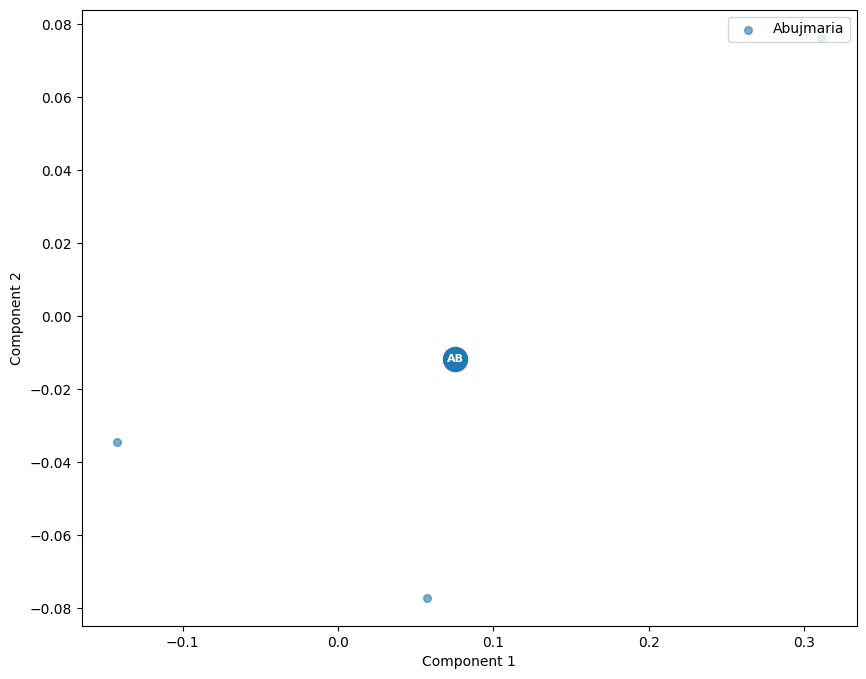

In [8]:
scatter(mdpca, labels_file)